<span style="color:pink;">Breast Cancer Detection</span>

In [598]:
from tabulate import tabulate 
member_name = [
    ["Hang Muykhorng", "Female", "19", "Y3-S2","e20220166"],
    ["Heang Denis", "Male", "21", "Y3-S2","e20220527"],
    ["Doeun Bunheng", "Male", "20", "Y3-S2","e20221528"],
    ["Chheang Udomveasna", "Male", "21", "Y3-S2","e20220918"],
    #["Chea Sopheaktra", "Female", "21", "Y3-S2","e20220573"],    
]
member_info = ["Name", "Gender", "Age", "Program", "ID"]
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

╒════════════════════╤══════════╤═══════╤═══════════╤═══════════╕
│ Name               │ Gender   │   Age │ Program   │ ID        │
╞════════════════════╪══════════╪═══════╪═══════════╪═══════════╡
│ Hang Muykhorng     │ Female   │    19 │ Y3-S2     │ e20220166 │
├────────────────────┼──────────┼───────┼───────────┼───────────┤
│ Heang Denis        │ Male     │    21 │ Y3-S2     │ e20220527 │
├────────────────────┼──────────┼───────┼───────────┼───────────┤
│ Doeun Bunheng      │ Male     │    20 │ Y3-S2     │ e20221528 │
├────────────────────┼──────────┼───────┼───────────┼───────────┤
│ Chheang Udomveasna │ Male     │    21 │ Y3-S2     │ e20220918 │
╘════════════════════╧══════════╧═══════╧═══════════╧═══════════╛


### Import the dependencies (libraries)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
import plotly.figure_factory as ff
import plotly.offline as py
import itertools  # Import itertools for generating index pairs
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


#import torch
#import torch.nn as nn
#import torch.optim as optim
#from sklearn.metrics import accuracy_score, classification_report
#from sklearn.neural_network import MLPClassifier

In [600]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Set display option to show all rows 
pd.set_option('display.max_rows', None)

# <font color = brown|><b> Load data

In [3]:
df = pd.read_csv('data.csv')
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [602]:
df.shape

(569, 33)

In [603]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [604]:
df.tail(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN

# <font color = brown|><b> Data Preprocessing

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

![Alt Text](![Screenshot 2025-03-28 at 8.49.38 in the morning.png](<attachment:Screenshot 2025-03-28 at 8.49.38 in the morning.png>))
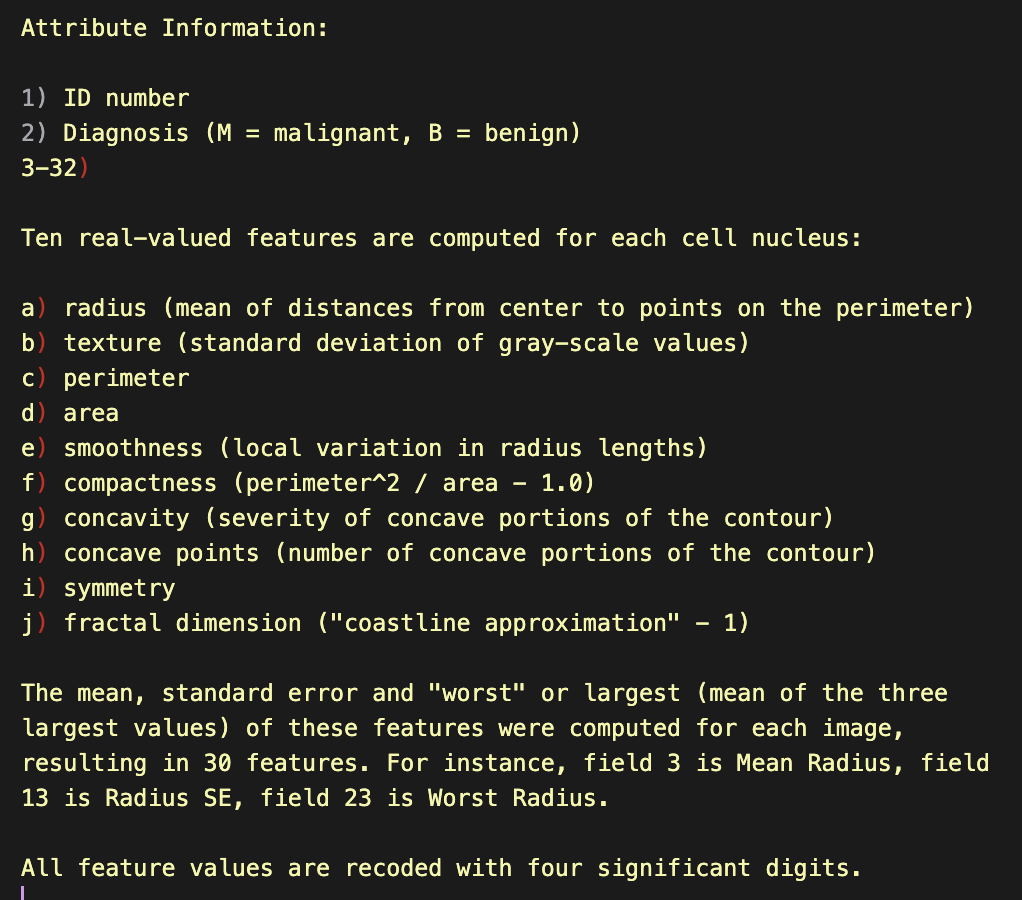

#### <font color = red|><b> Encode/Reassign "Categorical" column to "Numerical"

In [606]:
# Check unique values in the 'diagnosis' column
print("Unique State in the 'diagnosis' column:")
print(df['diagnosis'].unique())

# Optionally, count the occurrences of each grade
print("\nCount of each grade in the 'diagnosis' column:")
print(df['diagnosis'].value_counts())

Unique State in the 'diagnosis' column:
['M' 'B']

Count of each grade in the 'diagnosis' column:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [607]:
# label encoding(convert the value of M and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

# Method 2: Reassign target
#df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [608]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         1        17.99         10.38          122.80     1001.0   
1    842517         1        20.57         17.77          132.90     1326.0   
2  84300903         1        19.69         21.25          130.00     1203.0   
3  84348301         1        11.42         20.38           77.58      386.1   
4  84358402         1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [609]:
# Optionally, count the occurrences of each grade
print("\nCount of each grade in the 'diagnosis' column:")
print(df['diagnosis'].value_counts())


Count of each grade in the 'diagnosis' column:
diagnosis
0    357
1    212
Name: count, dtype: int64


1 --> Benign

0 --> Malignant

#### <font color = red|><b> check missing values, duplicates


In [610]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [611]:
df.shape

(569, 33)

In [612]:
df = df.dropna(axis=1) # drop the column w/ missing values 

In [613]:
df.shape

(569, 32)

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [615]:
df.duplicated().sum()

0

#### <font color = red|><b> statistical measures / Summary Stats

In [616]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

# <font color = brown|><b> EDA (Exploritory Data Analysis)

In [617]:
df.groupby('diagnosis').mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
0          2.654382e+07    12.146524     17.914762       78.075406   
1          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
0          462.790196         0.092478          0.080085        0.046058   
1          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  \
diagnosis                                                               
0                     0.025717       0.174186                0.062867   
1                     0.087990       0.192909                0.062680   

           radius_se  texture_se  perimeter_se    area_se  smoothness_se  \
diagnosis                                                                  
0           0.284082    1.220380      2.000321  21.135148       0.007196   
1           0.609083    1.210915      4.323929  72.672406       0.006780   

           compactness_se  concavity_se  concave points_se  symmetry_se  \
diagnosis                                                                 
0                0.021438      0.025997           0.009858     0.020584   
1                0.032281      0.041824           0.015060     0.020472   

           fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
diagnosis                                                                       
0                      0.003636     13.379801      23.515070        87.005938   
1                      0.004062     21.134811      29.318208       141.370330   

            area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                      
0           558.899440          0.124959           0.182673         0.166238   
1          1422.286321          0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.074444        0.270246                 0.079442  
1                      0.182237        0.323468                 0.091530

#### <font color = red|><b> checking the distribution of Target Varibale ('diagnosis")

In [618]:
# 2 datasets
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [619]:
#------------COUNT-----------------------
trace = go.Bar(
    x=(len(M), len(B)),
    y=['malignant', 'benign'],
    orientation='h',
    opacity=0.8,
    marker=dict(
        color=['#ff6347', '#4682b4'], 
        line=dict(color='#000000', width=1.5)
    )
)

layout = dict(
    title='Count of diagnosis variable',
    height=200,  # Adjust height to be smaller
    width=500,  # Adjust width to make it more compact
    margin=dict(t=30, b=30, l=30, r=30)  # Reduce margins
)

fig = go.Figure(data=[trace], layout=layout)

# Display the plot
fig.show()

#------------PERCENTAGE-------------------
trace = go.Pie(
    labels=['benign', 'malignant'],
    values=df['diagnosis'].value_counts(),
    textfont=dict(size=15),
    opacity=0.8,
    marker=dict(
        colors=['#4682b4', '#ff6347'],  # Updated colors
        line=dict(color='#000000', width=1.5)
    )
)

layout = dict(
    title='Distribution of diagnosis variable',
    height=200,  # Adjust height to be smaller
    width=500,  # Adjust width to make it more compact
    margin=dict(t=30, b=30, l=30, r=30)  # Reduce margins
)

fig = go.Figure(data=[trace], layout=layout)

# Display the pie chart
fig.show()

we get that our target var is IMBALANCE -> before building have to fix (by resampling...., or using class weight for Logistic Regression model)

#### <font color = red|><b> Understanding other features- Correlation 

In [620]:
df.iloc[:,1:32].corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

#### features dist (hue = diagnosis)

In [621]:
import plotly.figure_factory as ff

def plot_distribution(data_select, size_bin):  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#ff6347', '#4682b4']

    fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True, bin_size=size_bin, curve_type='kde', histnorm='probability density')
    
    # Adjust layout to make it more visually appealing
    fig.update_layout(
        title=data_select,
        xaxis_title='Value',
        yaxis_title='Density',
        template='plotly_white',  
        width=800,  
        height=400,  
    )

    fig.show()


In [622]:
plot_distribution('radius_mean', 0.2)

In [623]:
plot_distribution('texture_mean', 0.2)

In [624]:
plot_distribution('perimeter_mean', 0.2)

In [625]:
plot_distribution('area_mean', 0.2)

In [626]:
plot_distribution('smoothness_worst', 0.2)

In [627]:
plot_distribution('compactness_worst', 0.2)

In [628]:
plot_distribution('concavity_worst', 0.2)

In [629]:
plot_distribution('concave points_worst', 0.2)

In [630]:
plot_distribution('symmetry_worst', 0.2)

In [631]:
plot_distribution('fractal_dimension_worst', 0.2)

#### Positive corellated features 

In [632]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#ff6347',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#4682b4',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [633]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

#### Unrelated features 

In [634]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

#### Negative correlated features 

In [635]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

#### Correlation Matrix + drop unneccessary features

In [636]:
print(len(df.columns))
features = [i for i in df.columns if i not in['diagnosis']]
target = ['diagnosis']

32


##### drop stage 1:

In [637]:
features_drop = [] #create empty list to store dropped features

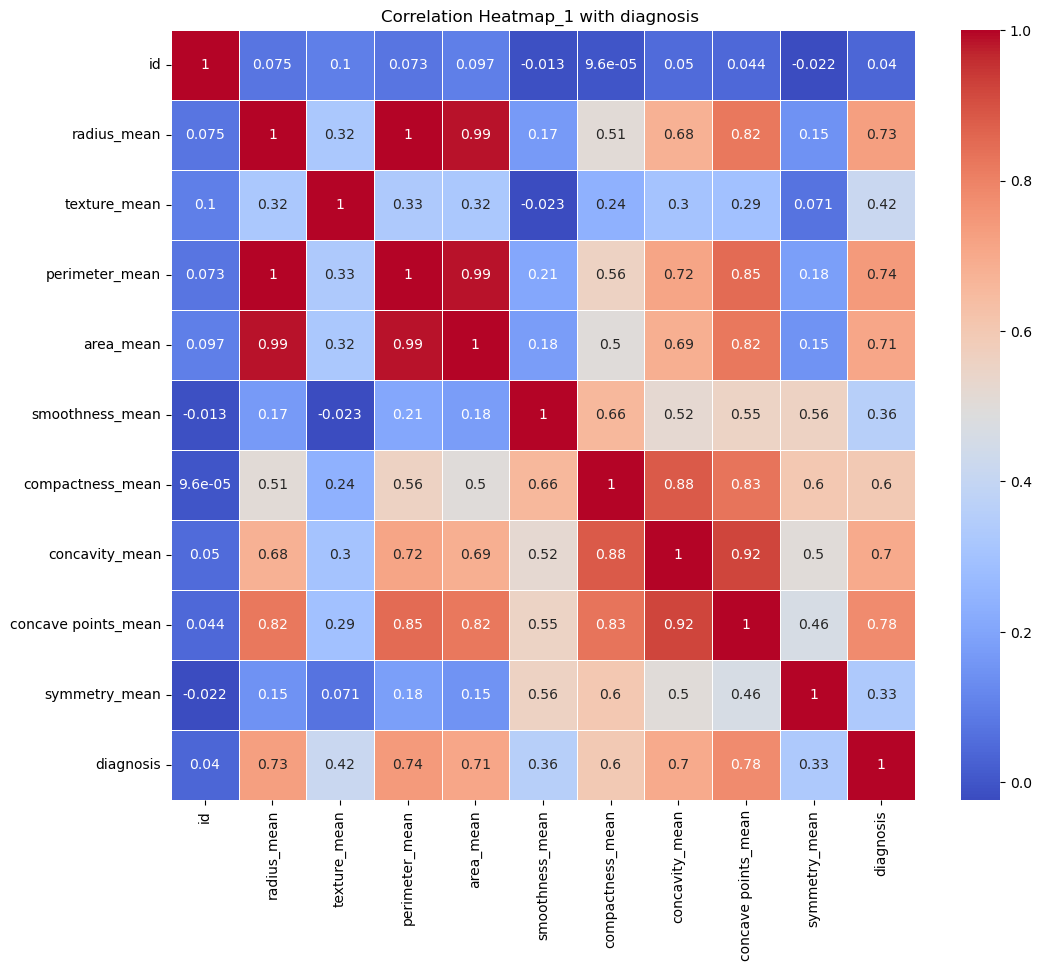

In [638]:
df_combined = df[features[0:10]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_1 with diagnosis ')
plt.show()

In [639]:
features_drop += ['id' ,'area_mean', 'concavity_mean']

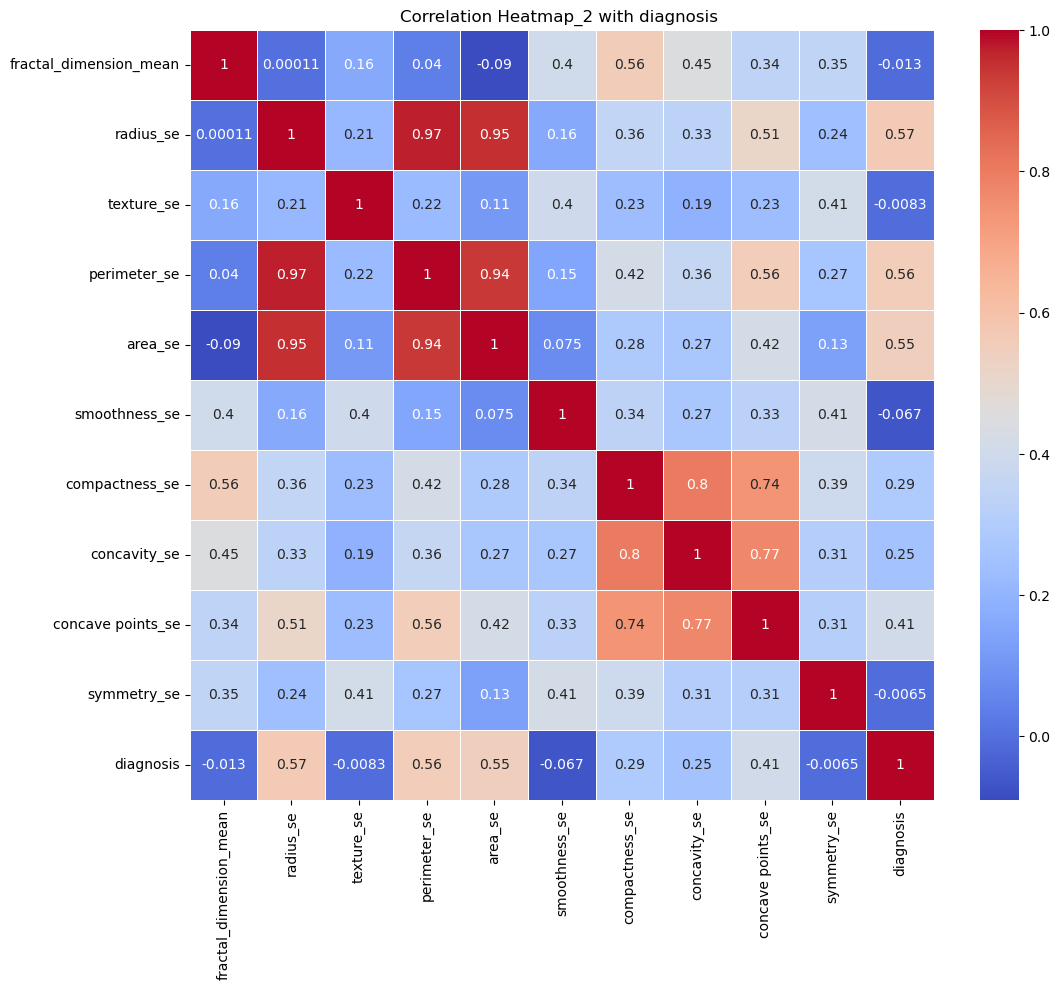

In [640]:
df_combined = df[features[10:20]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_2 with diagnosis ')
plt.show()

In [641]:
features_drop += ['fractal_dimension_se', 'texture_se', 'smoothness_se', 'compactness_se','concavity_se','symmetry_se', 'perimeter_se']

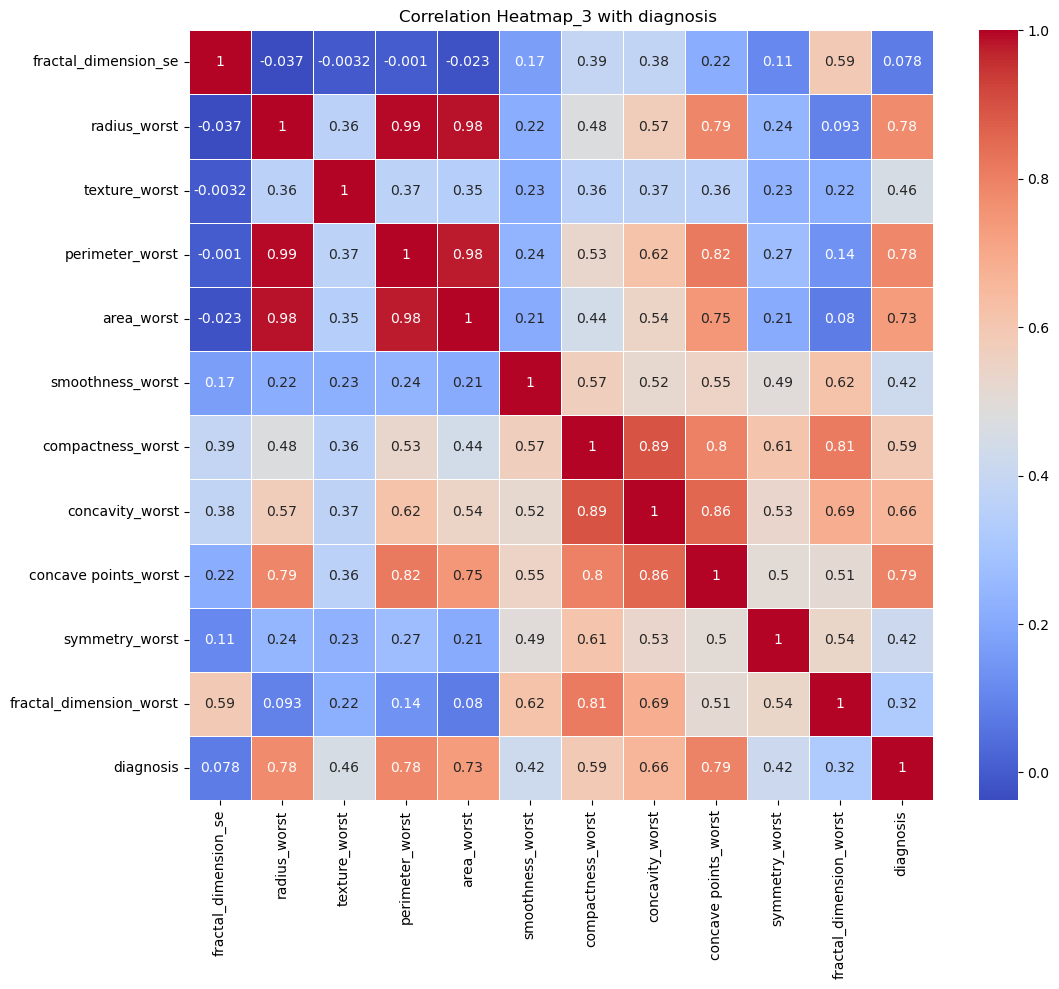

In [642]:
df_combined = df[features[20:31]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_3 with diagnosis ')
plt.show()

In [643]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [644]:
features_drop += ['fractal_dimension_mean','perimeter_worst', 'area_worst']

In [645]:
len(features_drop)

13

In [646]:
df = df.drop(columns = features_drop, axis=1)
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
0         1        17.99         10.38          122.80          0.11840   
1         1        20.57         17.77          132.90          0.08474   
2         1        19.69         21.25          130.00          0.10960   
3         1        11.42         20.38           77.58          0.14250   
4         1        20.29         14.34          135.10          0.10030   

   compactness_mean  concave points_mean  symmetry_mean  radius_se  area_se  \
0           0.27760              0.14710         0.2419     1.0950   153.40   
1           0.07864              0.07017         0.1812     0.5435    74.08   
2           0.15990              0.12790         0.2069     0.7456    94.03   
3           0.28390              0.10520         0.2597     0.4956    27.23   
4           0.13280              0.10430         0.1809     0.7572    94.44   

   concave points_se  radius_worst  texture_worst  smoothness_worst  \
0            0.01587         25.38          17.33            0.1622   
1            0.01340         24.99          23.41            0.1238   
2            0.02058         23.57          25.53            0.1444   
3            0.01867         14.91          26.50            0.2098   
4            0.01885         22.54          16.67            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [647]:
len(df.columns)

19

##### drop stage 2

In [648]:
features = [i for i in df.columns if i not in['diagnosis']]
target = ['diagnosis']

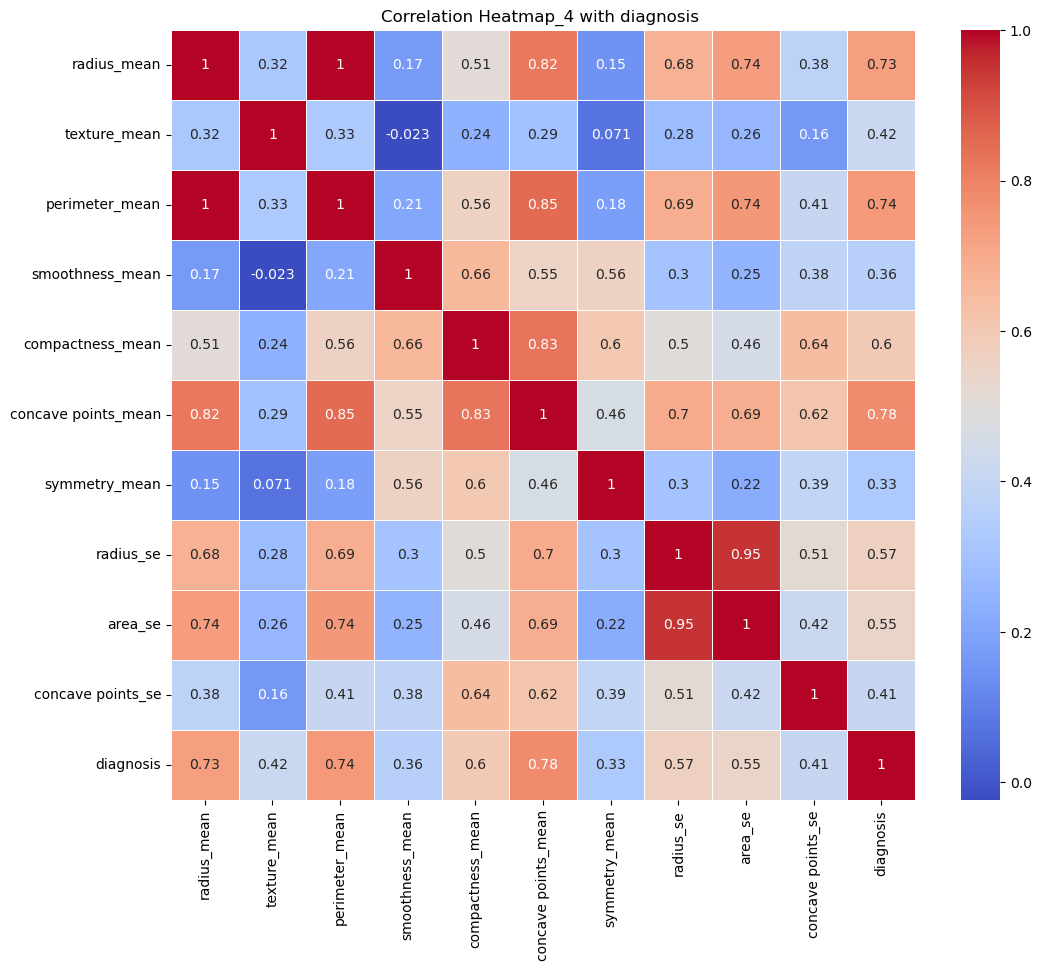

In [649]:
df_combined = df[features[0:10]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_4 with diagnosis ')
plt.show()

In [650]:
features_drop = []

In [651]:
features_drop += ['concave points_mean','area_se']

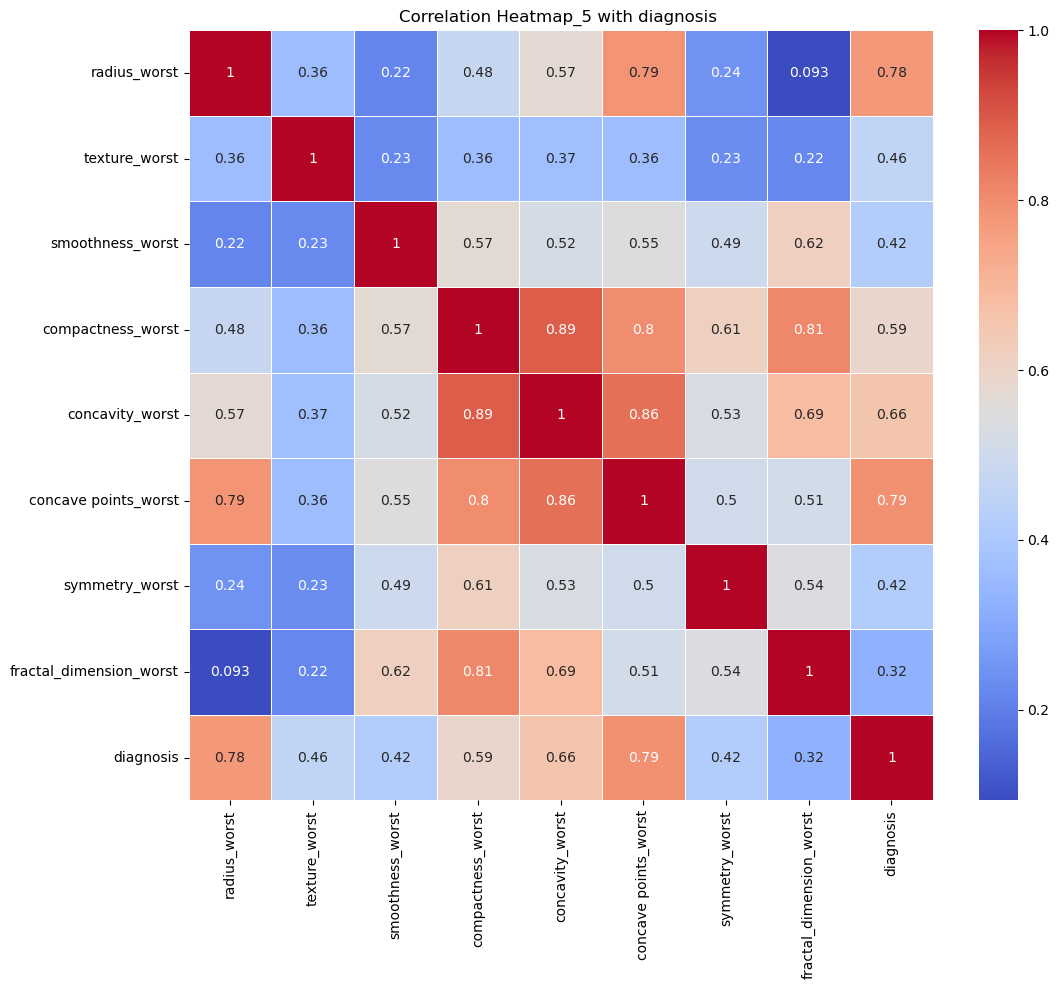

In [652]:
df_combined = df[features[10:19]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_5 with diagnosis ')
plt.show()

In [653]:
features_drop += ['compactness_worst', 'concavity_worst']

In [654]:
len(features_drop)

4

In [655]:
df = df.drop(columns = features_drop, axis=1)
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
0         1        17.99         10.38          122.80          0.11840   
1         1        20.57         17.77          132.90          0.08474   
2         1        19.69         21.25          130.00          0.10960   
3         1        11.42         20.38           77.58          0.14250   
4         1        20.29         14.34          135.10          0.10030   

   compactness_mean  symmetry_mean  radius_se  concave points_se  \
0           0.27760         0.2419     1.0950            0.01587   
1           0.07864         0.1812     0.5435            0.01340   
2           0.15990         0.2069     0.7456            0.02058   
3           0.28390         0.2597     0.4956            0.01867   
4           0.13280         0.1809     0.7572            0.01885   

   radius_worst  texture_worst  smoothness_worst  concave points_worst  \
0         25.38          17.33            0.1622                0.2654   
1         24.99          23.41            0.1238                0.1860   
2         23.57          25.53            0.1444                0.2430   
3         14.91          26.50            0.2098                0.2575   
4         22.54          16.67            0.1374                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

In [656]:
len(df.columns)

15

##### drop stage 3

In [657]:
features_drop = []

In [658]:
features = [i for i in df.columns if i not in['diagnosis']]
target = ['diagnosis']

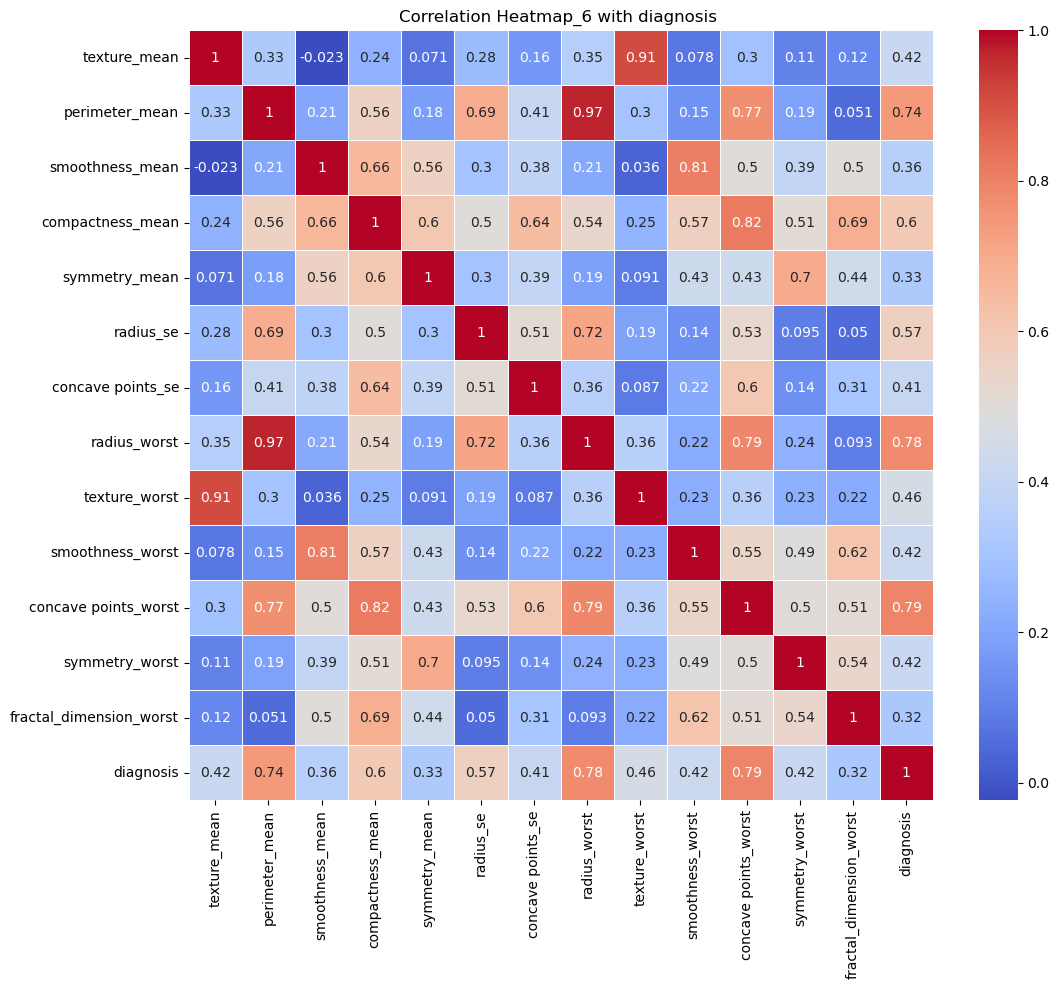

In [659]:
df_combined = df[features[1:15]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap_6 with diagnosis ')
plt.show()

In [660]:
features_drop += ['smoothness_mean', 'compactness_mean'] 

In [661]:
df = df.drop(columns = features_drop, axis=1)
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
0         1        17.99         10.38          122.80         0.2419   
1         1        20.57         17.77          132.90         0.1812   
2         1        19.69         21.25          130.00         0.2069   
3         1        11.42         20.38           77.58         0.2597   
4         1        20.29         14.34          135.10         0.1809   

   radius_se  concave points_se  radius_worst  texture_worst  \
0     1.0950            0.01587         25.38          17.33   
1     0.5435            0.01340         24.99          23.41   
2     0.7456            0.02058         23.57          25.53   
3     0.4956            0.01867         14.91          26.50   
4     0.7572            0.01885         22.54          16.67   

   smoothness_worst  concave points_worst  symmetry_worst  \
0            0.1622                0.2654          0.4601   
1            0.1238                0.1860          0.2750   
2            0.1444                0.2430          0.3613   
3            0.2098                0.2575          0.6638   
4            0.1374                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [662]:
len(df.columns)

13

In [663]:
features = [i for i in df.columns if i not in['diagnosis']]
target = ['diagnosis']

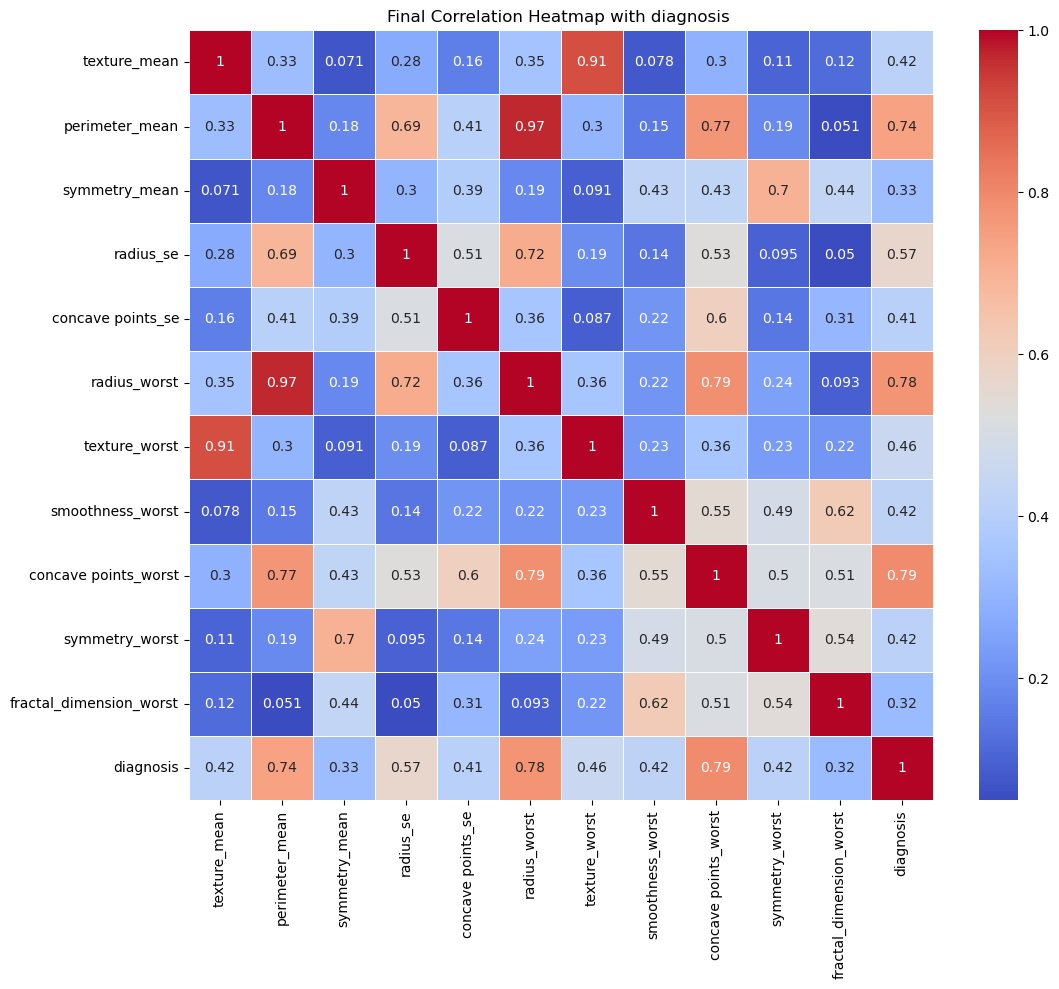

In [664]:
df_combined = df[features[1:13]+ target ]
corr = df_combined.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Final Correlation Heatmap with diagnosis ')
plt.show()

In [665]:
df_features = df[features]
df_target = df[target]
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
0         1        17.99         10.38          122.80         0.2419   
1         1        20.57         17.77          132.90         0.1812   
2         1        19.69         21.25          130.00         0.2069   
3         1        11.42         20.38           77.58         0.2597   
4         1        20.29         14.34          135.10         0.1809   

   radius_se  concave points_se  radius_worst  texture_worst  \
0     1.0950            0.01587         25.38          17.33   
1     0.5435            0.01340         24.99          23.41   
2     0.7456            0.02058         23.57          25.53   
3     0.4956            0.01867         14.91          26.50   
4     0.7572            0.01885         22.54          16.67   

   smoothness_worst  concave points_worst  symmetry_worst  \
0            0.1622                0.2654          0.4601   
1            0.1238                0.1860          0.2750   
2            0.1444                0.2430          0.3613   
3            0.2098                0.2575          0.6638   
4            0.1374                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

#### Data cleaning: IQR for outlier detection

In [666]:
features = df.select_dtypes(include=['number']).columns

for col in features:
    # Calculate IQR for outlier detection
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Display rows with outliers
    print(f"Outliers for {col}:")
    print(outliers)

    # Box Plot
    box_fig = px.box(df, y=col, title=f"Box Plot of {col}")
    box_fig.update_traces(marker=dict(color='lightblue'))
    box_fig.update_layout(width=500)
    
    # Histogram
    hist_fig = px.histogram(df, x=col, nbins=20, title=f"Histogram of {col}")
    hist_fig.update_traces(marker=dict(color='orange'))
    hist_fig.update_layout(width=500)
    
    # Show interactive plots
    box_fig.show()
    hist_fig.show()

Outliers for radius_mean:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
82          1        25.22         24.91           171.5         0.1829   
108         1        22.27         19.67           152.8         0.2556   
122         1        24.25         20.20           166.2         0.2655   
164         1        23.27         22.04           152.1         0.1801   
180         1        27.22         21.87           182.1         0.1800   
202         1        23.29         26.67           158.9         0.2200   
212         1        28.11         18.47           188.5         0.1648   
236         1        23.21         26.97           153.5         0.1909   
339         1        23.51         24.27           155.1         0.1797   
352         1        25.73         17.46           174.2         0.1956   
369         1        22.01         21.90           147.2         0.1824   
461         1        27.42         26.27           186.9         0.2061   

Outliers for texture_mean:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
219         1        19.53         32.47          128.00         0.1428   
232         0        11.22         33.81           70.79         0.1845   
239         1        17.46         39.28          113.40         0.1809   
259         1        15.53         33.56          103.70         0.2091   
265         1        20.73         31.12          135.70         0.1769   
455         0        13.38         30.72           86.34         0.1375   
562         1        15.22         30.62          103.40         0.2128   

     radius_se  concave points_se  radius_worst  texture_worst  \
219     0.7392           0.010780         27.90          45.41   
232     0.2239           0.003419         12.36          41.78   
239     0.5366           0.013740         22.51          44.87   
259     0.2419           0.010220         18.49          49.54   
265     1.1720           0.009280         

Outliers for perimeter_mean:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
82          1        25.22         24.91           171.5         0.1829   
108         1        22.27         19.67           152.8         0.2556   
122         1        24.25         20.20           166.2         0.2655   
164         1        23.27         22.04           152.1         0.1801   
180         1        27.22         21.87           182.1         0.1800   
202         1        23.29         26.67           158.9         0.2200   
212         1        28.11         18.47           188.5         0.1648   
236         1        23.21         26.97           153.5         0.1909   
339         1        23.51         24.27           155.1         0.1797   
352         1        25.73         17.46           174.2         0.1956   
461         1        27.42         26.27           186.9         0.2061   
503         1        23.09         19.83           152.1         0.1505

Outliers for symmetry_mean:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
3           1       11.420         20.38           77.58         0.2597   
22          1       15.340         14.26          102.50         0.2521   
25          1       17.140         16.40          116.00         0.3040   
60          0       10.170         14.88           64.55         0.2743   
78          1       20.180         23.97          143.70         0.2906   
108         1       22.270         19.67          152.80         0.2556   
122         1       24.250         20.20          166.20         0.2655   
146         1       11.800         16.58           78.99         0.2678   
150         0       13.000         20.78           83.51         0.2540   
152         0        9.731         15.34           63.78         0.2548   
258         1       15.660         23.20          110.20         0.2495   
288         0       11.260         19.96           73.72         0.2595 

Outliers for radius_se:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
0           1        17.99         10.38          122.80         0.2419   
12          1        19.17         24.80          132.40         0.2397   
25          1        17.14         16.40          116.00         0.3040   
27          1        18.61         20.25          122.10         0.1697   
38          1        14.99         25.20           95.54         0.1565   
42          1        19.07         24.81          128.30         0.2310   
77          1        18.05         16.15          120.20         0.2152   
78          1        20.18         23.97          143.70         0.2906   
82          1        25.22         24.91          171.50         0.1829   
108         1        22.27         19.67          152.80         0.2556   
122         1        24.25         20.20          166.20         0.2655   
138         1        14.95         17.57           96.85         0.1957   
1

Outliers for concave points_se:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
12          1       19.170         24.80          132.40         0.2397   
42          1       19.070         24.81          128.30         0.2310   
68          0        9.029         17.33           58.79         0.2111   
78          1       20.180         23.97          143.70         0.2906   
138         1       14.950         17.57           96.85         0.1957   
152         0        9.731         15.34           63.78         0.2548   
161         1       19.190         15.94          126.30         0.1741   
210         1       20.580         22.14          134.70         0.1765   
213         1       17.420         25.56          114.50         0.1308   
258         1       15.660         23.20          110.20         0.2495   
288         0       11.260         19.96           73.72         0.2595   
290         0       14.410         19.73           96.03         0.1

Outliers for radius_worst:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
23          1        21.16         23.04           137.2         0.1769   
82          1        25.22         24.91           171.5         0.1829   
108         1        22.27         19.67           152.8         0.2556   
164         1        23.27         22.04           152.1         0.1801   
180         1        27.22         21.87           182.1         0.1800   
212         1        28.11         18.47           188.5         0.1648   
219         1        19.53         32.47           128.0         0.1428   
236         1        23.21         26.97           153.5         0.1909   
265         1        20.73         31.12           135.7         0.1769   
272         1        21.75         20.99           147.3         0.1721   
339         1        23.51         24.27           155.1         0.1797   
352         1        25.73         17.46           174.2         0.1956  

Outliers for texture_worst:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
219         1        19.53         32.47           128.0         0.1428   
239         1        17.46         39.28           113.4         0.1809   
259         1        15.53         33.56           103.7         0.2091   
265         1        20.73         31.12           135.7         0.1769   
562         1        15.22         30.62           103.4         0.2128   

     radius_se  concave points_se  radius_worst  texture_worst  \
219     0.7392            0.01078         27.90          45.41   
239     0.5366            0.01374         22.51          44.87   
259     0.2419            0.01022         18.49          49.54   
265     1.1720            0.00928         32.49          47.16   
562     0.2602            0.01608         17.52          42.79   

     smoothness_worst  concave points_worst  symmetry_worst  \
219            0.1408                0.1625          0.2713  

Outliers for smoothness_worst:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
3           1       11.420         20.38           77.58         0.2597   
41          1       10.950         21.35           71.90         0.1895   
192         0        9.720         18.22           60.73         0.1653   
203         1       13.810         23.75           91.56         0.2251   
379         1       11.080         18.83           73.30         0.2196   
504         0        9.268         12.87           61.49         0.2378   
505         0        9.676         13.14           64.12         0.2057   

     radius_se  concave points_se  radius_worst  texture_worst  \
3       0.4956            0.01867        14.910          26.50   
41      0.2366            0.01037        12.840          35.34   
192     0.3539            0.00000         9.968          20.83   
203     0.5648            0.01291        19.200          41.85   
379     0.2114            0.01339     

Outliers for concave points_worst:
Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, symmetry_mean, radius_se, concave points_se, radius_worst, texture_worst, smoothness_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []


Outliers for symmetry_worst:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
0           1       17.990         10.38          122.80         0.2419   
3           1       11.420         20.38           77.58         0.2597   
8           1       13.000         21.82           87.50         0.2350   
9           1       12.460         24.04           83.97         0.2030   
15          1       14.540         27.54           96.73         0.2303   
22          1       15.340         14.26          102.50         0.2521   
26          1       14.580         21.53           97.41         0.2252   
31          1       11.840         18.70           77.93         0.2301   
34          1       16.130         17.88          107.00         0.1998   
35          1       16.740         21.59          110.10         0.1896   
42          1       19.070         24.81          128.30         0.2310   
68          0        9.029         17.33           58.79         0.2111

Outliers for fractal_dimension_worst:
    diagnosis  radius_mean  texture_mean  perimeter_mean  symmetry_mean  \
3           1       11.420         20.38           77.58         0.2597   
5           1       12.450         15.70           82.57         0.2087   
9           1       12.460         24.04           83.97         0.2030   
14          1       13.730         22.61           93.60         0.2069   
15          1       14.540         27.54           96.73         0.2303   
26          1       14.580         21.53           97.41         0.2252   
31          1       11.840         18.70           77.93         0.2301   
34          1       16.130         17.88          107.00         0.1998   
72          1       17.200         24.52          114.20         0.1927   
105         1       13.110         15.56           87.21         0.1925   
118         1       15.780         22.91          105.70         0.2096   
151         0        8.219         20.70           53.27      

we can see that, final features do have outlier, and Logistic regression model is sensitive to outlier (might lead to skewness if not handled)-> handle outlier

##### <font color = red|><b> handle outliers using Capping (Winsorization) method 


Upper Fence = $ Q3 + 1.5 \times \text{IQR} = 15.7975 + 1.5 \times 4.1 = 15.7975 + 6.15 = 21.75 $

In [667]:
def cap_outliers(df):
    # Loop over all numeric features in the dataframe
    for col in df.select_dtypes(include=['number']).columns:
        # Calculate IQR for the current column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # Apply capping: cap values below lower_fence and above upper_fence
        df[col] = df[col].apply(lambda x: min(max(x, lower_fence), upper_fence))

        # Check changes in each column (optional)
        print(f"Outliers capped for {col}:")
        print(df[col].describe())

        # Create box plot for the column after capping
        box_fig = px.box(df, y=col, title=f"Box Plot of {col} after Capping")
        box_fig.update_traces(marker=dict(color='lightblue'))
        box_fig.update_layout(width=500)
        box_fig.show()

    return df

In [668]:
df = cap_outliers(df)

Outliers capped for radius_mean:
count    569.000000
mean      14.062916
std        3.340025
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       21.900000
Name: radius_mean, dtype: float64


Outliers capped for texture_mean:
count    569.000000
mean      19.254736
std        4.187510
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       30.245000
Name: texture_mean, dtype: float64


Outliers capped for perimeter_mean:
count    569.000000
mean      91.543787
std       23.047218
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      147.495000
Name: perimeter_mean, dtype: float64


Outliers capped for symmetry_mean:
count    569.000000
mean       0.180734
std        0.026067
min        0.111200
25%        0.161900
50%        0.179200
75%        0.195700
max        0.246400
Name: symmetry_mean, dtype: float64


Outliers capped for radius_se:
count    569.000000
mean       0.384698
std        0.203612
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        0.848650
Name: radius_se, dtype: float64


Outliers capped for concave points_se:
count    569.000000
mean       0.011601
std        0.005486
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.025318
Name: concave points_se, dtype: float64


Outliers capped for radius_worst:
count    569.000000
mean      16.183882
std        4.587249
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       27.460000
Name: radius_worst, dtype: float64


Outliers capped for texture_worst:
count    569.000000
mean      25.648453
std        6.054406
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       42.680000
Name: texture_worst, dtype: float64


Outliers capped for smoothness_worst:
count    569.000000
mean       0.132209
std        0.022320
min        0.072500
25%        0.116600
50%        0.131300
75%        0.146000
max        0.190100
Name: smoothness_worst, dtype: float64


Outliers capped for concave points_worst:
count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64


Outliers capped for symmetry_worst:
count    569.000000
mean       0.287616
std        0.053868
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.419150
Name: symmetry_worst, dtype: float64


Outliers capped for fractal_dimension_worst:
count    569.000000
mean       0.083342
std        0.015993
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.123010
Name: fractal_dimension_worst, dtype: float64


# <font color = brown|><b> Prepare dataset 

In [669]:
# split data into features and target
X = np.array(df.drop('diagnosis', axis=1).values)
y = np.array(df['diagnosis'].tolist())
df = df.drop('diagnosis', axis=1)




#### <font color = red|><b> Train Test Split 

In [670]:
from sklearn.model_selection import train_test_split

# Train-test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#### <font color = red|><b> Scale only the training data + apply same transformation to test data

In [671]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X = scaler.fit_transform(X)  # fit_transform is used to fit the scaler to the data and then transform it

X_train = scaler.fit_transform(X_train) # Scale only the training data, then apply the same transformation to the test data
X_test = scaler.transform(X_test)

#### <font color = red|><b> For web building only!

In [672]:
train_means = scaler.mean_
train_stds = scaler.scale_

In [673]:
print("Feature means:", train_means)
print("Feature stds:", train_stds)

Feature means: [1.40472835e+01 1.91432967e+01 9.14133297e+01 1.80665934e-01
 3.80262308e-01 1.16588549e-02 1.61528176e+01 2.55095604e+01
 1.31404505e-01 1.14182222e-01 2.87792088e-01 8.33298242e-02]
Feature stds: [3.32892386e+00 4.12197438e+00 2.29018890e+01 2.61688105e-02
 2.00404146e-01 5.46509982e-03 4.56524882e+00 5.97307352e+00
 2.26520832e-02 6.52542583e-02 5.43756382e-02 1.62141906e-02]


# <font color = brown|><b> Predictive model: Logistic Regression (built-in functions)

#### <font color = red|><b> initialize the Logistic Regression model

In [674]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42) # class_weight='balanced'): The differences are minimal, indicating your model is already balanced enough without additional weighting

#### <font color = red|><b> train model on the training data


In [675]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### <font color = red|><b> make predictions on the test data


In [676]:
y_pred = logreg.predict(X_test)

#### <font color = red|><b> evaluate the model

In [677]:
# Assuming y_true are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)

##### confusion matrix

In [678]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[69  2]
 [ 1 42]]


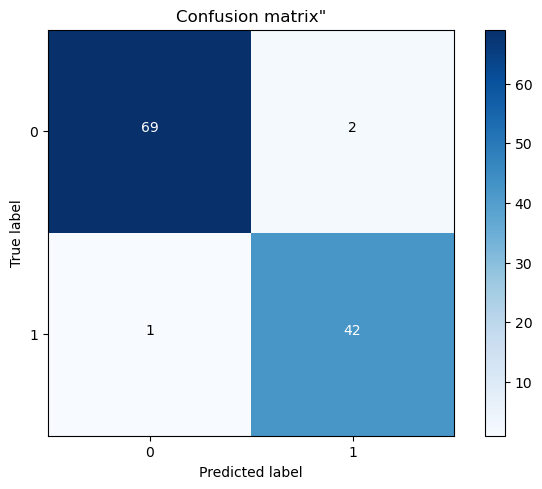

In [679]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plotting the confusion matrix (you can use the plot_confusion_matrix function you defined earlier)
plot_confusion_matrix(cm, classes=['0', '1'])


##### check features importance 

In [680]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean',
       'radius_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [681]:
df.shape

(569, 12)

In [682]:
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean',
       'radius_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'] 

# Fit the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance (descending)

# Convert importances to percentages
importances_percent = importances[indices] * 100

# Create a DataFrame for Plotly using the actual feature names
importance_df = pd.DataFrame({
    'Feature': np.array(feature_names)[indices],  # Sorted feature names from feature_names
    'Importance': importances_percent  # Corresponding importances as percentage
})

# Create an interactive Plotly bar chart
fig = px.bar(
    importance_df,
    x='Feature',
    y='Importance',
    title="Feature Importances",
    labels={'Feature': 'Feature', 'Importance': 'Importance (%)'},
    text='Importance'
)

# Customize the layout for better clarity
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance (%)",
    xaxis_tickangle=45
)

# Show the interactive plot
fig.show()

##### Cross validation 

In [683]:
# RandomForest model & cross-validation
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Output the results
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

CV scores: [1.         0.94505495 0.98901099 0.95604396 0.95604396]
Mean CV accuracy: 0.9692307692307693


#### <font color = red|><b> model result interpretations

![Alt Text](![![Screenshot 2025-03-29 at 10.07.55 at night.png](<attachment:Screenshot 2025-03-29 at 10.07.55 at night.png>)]
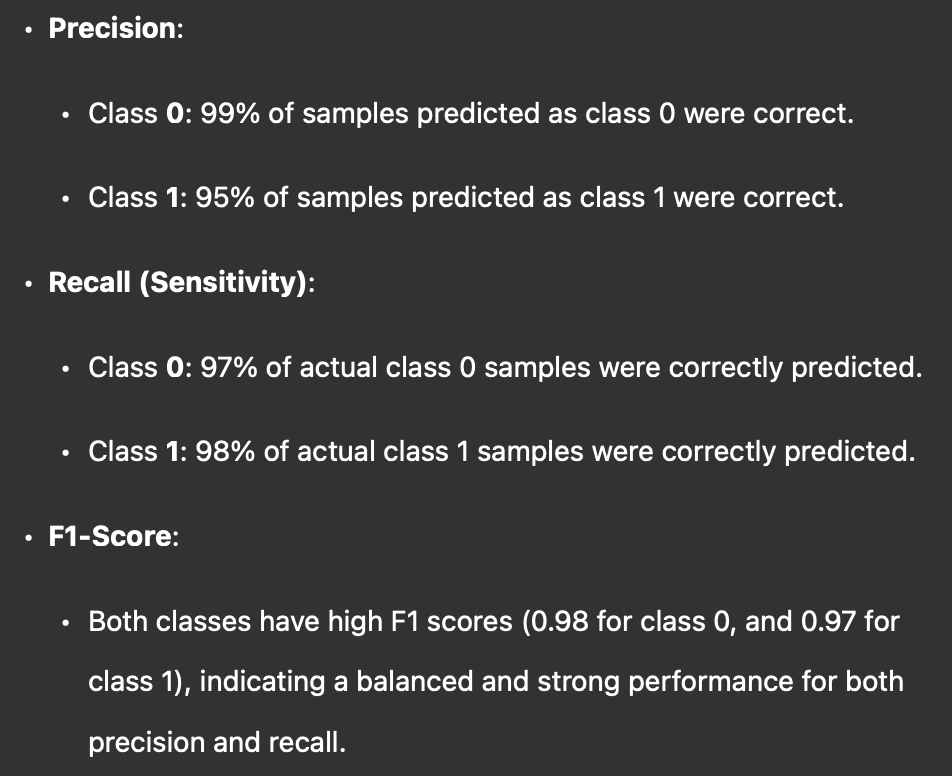

![Alt Text](![![![Screenshot 2025-03-29 at 10.09.42 at night.png](<attachment:Screenshot 2025-03-29 at 10.09.42 at night.png>)]
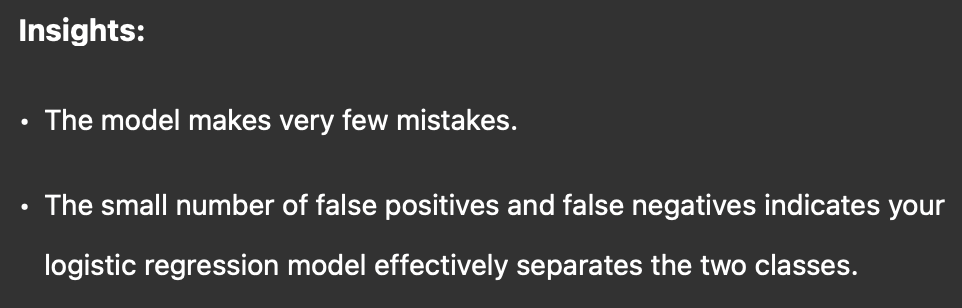

#### <font color = red|><b> Logistic Regression model

In [684]:
from sklearn.linear_model import LogisticRegression

# Assuming you've built your model and named it `logreg`
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Coefficients: [[ 1.0101444   0.32567577  0.97033092 -0.35326994  1.62815214 -0.12261479
   1.53529424  1.24230861  0.99669654  1.79982395  0.97844936 -0.23843274]]
Intercept: [-0.90499196]


In [685]:
# df has only feature columns (no "diagnosis" column)
print(df.columns)  # confirm the feature names

feature_cols = df.columns  # store the feature names
X = df.values              # your feature matrix

# Suppose you already have a trained logistic regression model named `logreg`
# and a separate variable y = diagnosis (for training).

# Print the logistic regression equation
intercept = logreg.intercept_[0]
coefficients = logreg.coef_[0]

equation = "logit(p) = {:.4f}".format(intercept)
for coef, feature in zip(coefficients, feature_cols):
    equation += " + ({:.4f} * {})".format(coef, feature)

print(equation)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean',
       'radius_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
logit(p) = -0.9050 + (1.0101 * radius_mean) + (0.3257 * texture_mean) + (0.9703 * perimeter_mean) + (-0.3533 * symmetry_mean) + (1.6282 * radius_se) + (-0.1226 * concave points_se) + (1.5353 * radius_worst) + (1.2423 * texture_worst) + (0.9967 * smoothness_worst) + (1.7998 * concave points_worst) + (0.9784 * symmetry_worst) + (-0.2384 * fractal_dimension_worst)


# <font color = brown|><b> Predictive model: Logistic Regression (from scratch)

In [686]:
# 1. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Cost Function (Binary Cross-Entropy)
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = sigmoid(X.dot(theta))  # Predicted probability
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))  # Cross-entropy cost
    return cost

# 3. Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of training examples
    cost_history = []

    for _ in range(iterations):
        predictions = sigmoid(X.dot(theta))  # Predicted probability
        gradient = 1/m * X.T.dot(predictions - y)  # Compute gradient
        theta -= learning_rate * gradient  # Update weights (theta)
        cost_history.append(compute_cost(X, y, theta))  # Store cost history
    
    return theta, cost_history

# 4. Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    # Add intercept (bias) term to X
    X = np.c_[np.ones((X.shape[0], 1)), X]  # Add column of ones for bias term
    theta = np.zeros(X.shape[1])  # Initialize weights (theta)
    
    # Perform gradient descent to optimize theta
    theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
    
    return theta, cost_history

# 5. Prediction Function
def predict(X, theta):
    # Add intercept (bias) term to X
    X = np.c_[np.ones((X.shape[0], 1)), X]  # Add column of ones for bias term
    predictions = sigmoid(X.dot(theta))  # Predicted probabilities
    return [1 if p > 0.5 else 0 for p in predictions]  # Convert probabilities to binary predictions

# Train the model
theta, cost_history = logistic_regression(X_train, y_train, learning_rate=0.1, iterations=1000)

# Make predictions on the test set 
y_pred = predict(X_test, theta)

# Evaluate the model (accuracy, confusion matrix, etc.)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9737
Confusion Matrix:
 [[69  2]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [687]:
# Logistic regression with cross-validation
def logistic_regression_with_cross_validation(X, y, learning_rate=0.01, iterations=1000, cv_folds=5):
    # Add intercept (bias) term to X
    X = np.c_[np.ones((X.shape[0], 1)), X]  # Add column of ones for bias term
    # Initialize weights (theta)
    theta = np.zeros(X.shape[1])

    # Perform gradient descent to optimize theta
    theta, _ = gradient_descent(X, y, theta, learning_rate, iterations)

    # Use cross-validation
    scores = cross_val_score(LogisticRegression(), X, y, cv=cv_folds, scoring='accuracy')
    
    return scores, theta


# Using cross-validation for the logistic regression model
scores, final_theta = logistic_regression_with_cross_validation(X_train, y_train)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.97802198 0.95604396 0.96703297 0.97802198 0.94505495]
Mean accuracy: 0.9648


# <font color = brown|><b> Predictive model: Random Forest 

#### <font color = red|><b> 1. Data Preprocessing

In [4]:
# 1. Drop unnecessary columns
df.drop(columns=['id'], inplace=True)

In [5]:
# 2. Encode categorical values (M = 1, B = 0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [6]:
# 3. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32           

In [7]:
# 4. Feature scaling
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\MSI PC\anaconda1\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning:

invalid value encountered in divide

c:\Users\MSI PC\anaconda1\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning:

invalid value encountered in divide

c:\Users\MSI PC\anaconda1\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning:

invalid value encountered in divide



In [8]:
# Reconstruct DataFrame with scaled features
df_processed = pd.DataFrame(features_scaled, columns=features.columns)
df_processed['diagnosis'] = target.values

In [9]:
# Optional: check basic stats
print(df_processed.describe())

        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.26182

#### <font color = red|><b> 2. Split the Dataset

In [10]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_processed.drop(columns=['diagnosis'])
y = df_processed['diagnosis']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Print the shape of each set
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (455, 31)
Testing features shape: (114, 31)
Training labels shape: (455,)
Testing labels shape: (114,)


#### <font color = red|><b> 3. Build the Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model using training data
rf_model.fit(X_train, y_train)

# Optional: Print training accuracy
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 1.0000


#### <font color = red|><b> 4. Evaluate the Model
### Use the test data to predict and evaluate:

### Accuracy
### Precision, Recall, F1-Score

### Confusion Matrix

### ROC-AUC (for binary classification)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1 Score: 0.95
ROC-AUC Score: 0.9938822751322751

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



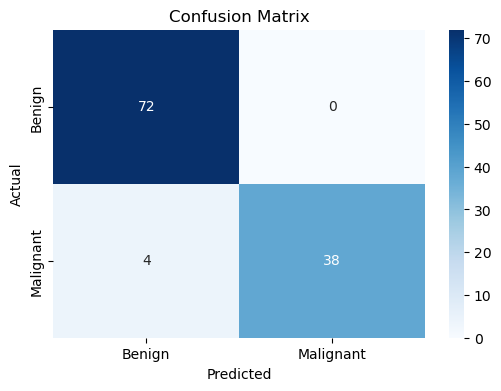

CV scores: [1.         0.98901099 0.93406593 0.96703297 0.91208791]
Mean CV accuracy: 0.9604395604395606


In [13]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)


# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Print individual metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# RandomForest model & cross-validation
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Output the results
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

# <font color = brown|><b> Predictive model: Neural Network 

In [691]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools

#### <font color = red|><b> convert to PyTorch tensors

In [692]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#### <font color = red|><b> define the neural network model 

In [693]:
print(X_train.shape) 

(455, 12)


In [694]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(12, 5)  # Input size = 12 
        self.fc2 = nn.Linear(5, 5)   # Hidden layer
        self.fc3 = nn.Linear(5, 2)   # Output layer with 2 classes (malignant or benign)

    def forward(self, X):
        a1 = torch.sigmoid(self.fc1(X))  # First hidden layer with sigmoid activation
        a2 = torch.sigmoid(self.fc2(a1)) # Second hidden layer with sigmoid activation
        return self.fc3(a2)  # Raw logits for CrossEntropyLoss (no activation here)

#### <font color = red|><b> initializing the Model, Loss Function, and Optimizer

In [695]:
# Initialize the model
model = NeuralNetwork()

# Cross-Entropy Loss for multi-class classification
cost_function = nn.CrossEntropyLoss()

# Learning rate and optimizer
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

#### <font color = red|><b>  training the Model

In [696]:
# Training the model
epochs = 2000
cost_values = []

for epoch in range(epochs):
    optimizer.zero_grad()  # Reset the gradients
    
    # Forward pass
    output = model(X_train_tensor)
    
    # Compute cost
    cost = cost_function(output, y_train_tensor)
    
    # Backward pass and optimization
    cost.backward()
    optimizer.step()
    
    # Append cost for plotting
    cost_values.append(cost.item())
    
    # Print cost every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1:03d}: Cost {cost.item():.4f}')

Epoch 100: Cost 0.6473
Epoch 200: Cost 0.5983
Epoch 300: Cost 0.4099
Epoch 400: Cost 0.2149
Epoch 500: Cost 0.1413
Epoch 600: Cost 0.1122
Epoch 700: Cost 0.0982
Epoch 800: Cost 0.0902
Epoch 900: Cost 0.0851
Epoch 1000: Cost 0.0815
Epoch 1100: Cost 0.0789
Epoch 1200: Cost 0.0768
Epoch 1300: Cost 0.0751
Epoch 1400: Cost 0.0736
Epoch 1500: Cost 0.0723
Epoch 1600: Cost 0.0712
Epoch 1700: Cost 0.0701
Epoch 1800: Cost 0.0691
Epoch 1900: Cost 0.0682
Epoch 2000: Cost 0.0673


#### <font color = red|><b> evalutate the model 

In [697]:
# Evaluate the model on test data
output_test = model(X_test_tensor)
y_hat_test = torch.argmax(output_test, dim=1)

# Calculate accuracy
accuracy = (y_hat_test == y_test_tensor).sum().item() / len(y_test_tensor)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.37%



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy: 0.974


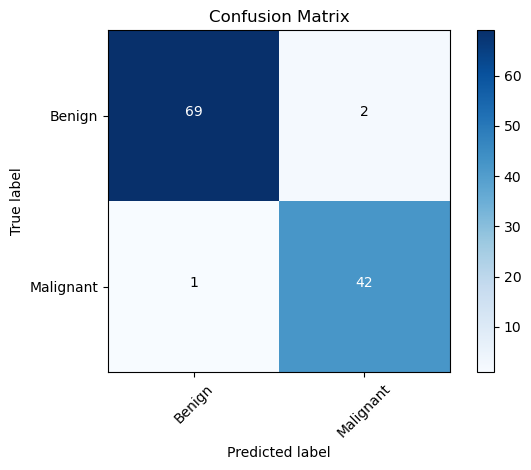

In [698]:
# Confusion Matrix and Classification Metrics
y_pred = y_hat_test.numpy()  # Convert predictions to numpy array for sklearn metrics

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.3f}")

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'])

#### <font color = red|><b> Plotting the Cost Over Epochs

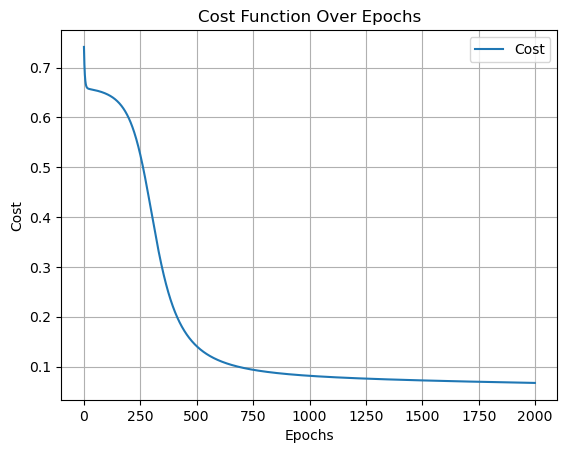

In [699]:
# Plot the cost function over epochs
plt.plot(range(epochs), cost_values, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Over Epochs')
plt.legend()
plt.grid(True)
plt.show()